In [1]:
# Provides ways to work with large multidimensional arrays
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd
from pandas_datareader import data as web # Reads stock data 
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline

import datetime as dt # For defining dates
import mplfinance as mpf # Matplotlib finance

import time

# Used to get data from a directory
import os
from os import listdir
from os.path import isfile, join

#Statsmodels is a great library we can use to run regressions.
import statsmodels.api as sm
# Seaborn extends the capabilities of Matplotlib
import seaborn as sns
# Used for calculating regressions
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

Dates & Other Constants

In [3]:
# Define path to files
# For MacOS
# PATH = "/Users/derekbanas/Documents/Tutorials/Python for Finance/Stocks/"
# For Windows
PATH = "../raw_data/data_stocks/"

# Start date defaults
S_YEAR = 2019
S_MONTH = 1
S_DAY = 3
S_DATE_STR = "2019-01-03"
S_DATE_DATETIME = dt.datetime(S_YEAR, S_MONTH, S_DAY)

# End date defaults
E_YEAR = 2022
E_MONTH = 4
E_DAY = 1
E_DATE_STR = "2022-04-01"
E_DATE_DATETIME = dt.datetime(E_YEAR, E_MONTH, E_DAY)

risk_free_rate = 0.0125 # Approximate 10 year bond rate

Get Stock File Names in a List

In [4]:
files = [x for x in listdir(PATH) if isfile(join(PATH, x))]
tickers = [os.path.splitext(x)[0] for x in files]
tickers

# On MacOS Only
# tickers.remove('.DS_Store')
# 2886 total stocks
tickers.sort()
len(tickers)

2896

Function that Returns a Dataframe from a CSV

In [5]:
def get_df_from_csv(ticker):
    try:
        df = pd.read_csv(PATH + ticker + '.csv', index_col='Date', 
                         parse_dates=True)
    except FileNotFoundError:
        pass
        # print("File Doesn't Exist")
    else:
        return df

Merge Multiple Stocks in One Dataframe by Column Name

In [6]:
def merge_df_by_column_name(col_name, sdate, edate, *tickers):
    # Will hold data for all dataframes with the same column name
    mult_df = pd.DataFrame()
    
    for x in tickers:
        df = get_df_from_csv(x)
        mask = (df.index >= sdate) & (df.index <= edate)
        mult_df[x] = df.loc[mask][col_name]
        
    return mult_df

Markowitz Portfolio Optimization

Harry Markowitz proved that you could make what is called an efficient portfolio. That is a portfolio that optimizes return while also minimizing risk. We don't benefit from analyzing individual securities at the same rate as if we instead considered a portfolio of stocks.

We do this by creating portfolios with stocks that are not correlated. We want to calculate expected returns by analyzing the returns of each stock multiplied by its weight.

w1r1 + w2r2 = rp

The standard deviation of the portfolio is found this way. Sum multiple calculations starting by finding the product of the first securities weight squared times its standard deviation squared. The middle is 2 times the correlation coefficient between the stocks. And, finally add those to the weight squared times the standard deviation squared for the second security.

(w1.std1 + w2.std2)^2 = w1^2.std1^2 + 2.w1.std1.w2.std2 p1 + w2^2.std2^2

**Plotting an Efficient Frontier**

Stock Portfolio

In [8]:
# I used the calculations made in part 4 of this course to pick the best performing
# stocks in the main sectors in the year 2018 through 2019
# I made slight changes in those situations that allowed me to pick companies I knew
port_list = ["GNRC", "DXCM", "AMD", "NFLX", "COST", "TGT", "AES", "MSCI", 
             "NEM", "AMT", "HES"]

Merge all Stock Price Data

In [10]:
mult_df = merge_df_by_column_name('Adj Close',  '2019-01-03', 
                                  '2022-04-01', *port_list)
mult_df

,GNRC,DXCM,AMD,NFLX,COST,TGT,AES,MSCI,NEM,AMT,HES
Date,,,,,,,,,,,
2019-01-03,49.150002,112.260002,17.049999,271.200012,190.035645,61.140224,12.853230,137.345947,31.070665,149.098923,40.064442
2019-01-04,51.139999,116.239998,19.000000,297.570007,195.554077,61.979939,13.279554,142.457336,31.070665,149.694641,43.183399
2019-01-07,51.070000,129.949997,20.570000,315.339996,196.274689,65.012230,13.343051,143.118088,30.700132,150.621323,45.253258
2019-01-08,51.970001,131.520004,20.750000,320.269989,197.744400,64.946915,13.651454,146.091644,30.790506,152.323334,45.820335
2019-01-09,52.770000,138.750000,20.190001,319.959991,199.024445,65.581352,13.624243,147.520111,31.061626,150.990082,47.408173
...,...,...,...,...,...,...,...,...,...,...,...
2022-03-28,312.329987,495.079987,120.239998,378.510010,565.210022,219.520004,24.650000,507.809998,78.139999,245.029999,107.419998
2022-03-29,321.140015,515.289978,123.230003,391.820007,569.979980,222.929993,25.450001,516.770020,78.550003,250.550003,107.690002
2022-03-30,311.059998,519.020020,119.220001,381.470001,576.469971,221.960007,25.450001,510.279999,79.959999,250.869995,108.559998


Plot Growth of Investments over Total Dataset

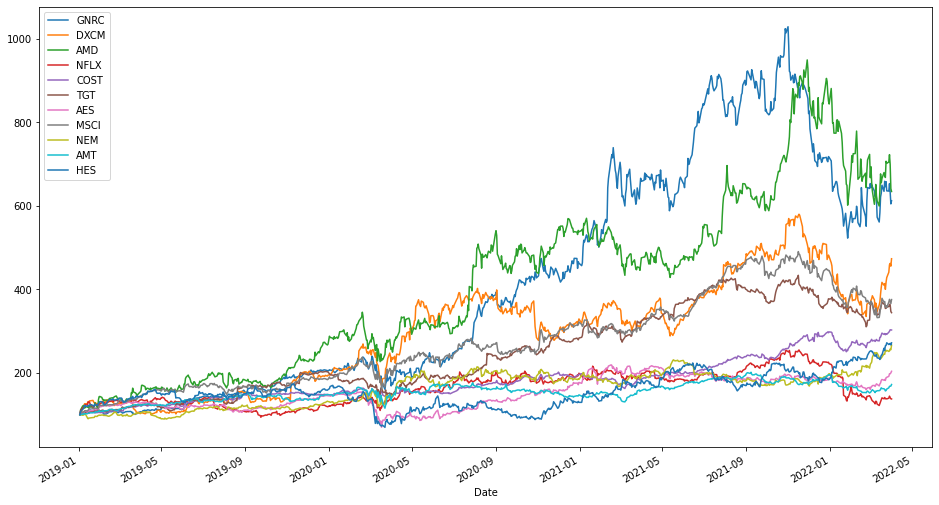

In [12]:
(mult_df / mult_df.iloc[0] *100).plot(figsize = (16,9));

Mean Returns

In [13]:
returns = np.log(mult_df / mult_df.shift(1))
mean_ret = returns.mean() *252 # 252 average trading days per year
mean_ret

GNRC    0.558292
DXCM    0.479052
AMD     0.569230
NFLX    0.098576
COST    0.341386
TGT     0.380928
AES     0.219630
MSCI    0.407761
NEM     0.301883
AMT     0.167673
HES     0.308305
dtype: float64

Covariance

In [14]:
returns.cov()*252

,GNRC,DXCM,AMD,NFLX,COST,TGT,AES,MSCI,NEM,AMT,HES
GNRC,0.194974,0.078020,0.098875,0.058992,0.038301,0.049820,0.075896,0.080739,0.023962,0.050573,0.074566
DXCM,0.078020,0.225413,0.099176,0.067888,0.030969,0.034220,0.054564,0.093251,0.016334,0.048675,0.056271
AMD,0.098875,0.099176,0.286084,0.097461,0.051637,0.059144,0.062837,0.105212,0.023525,0.052879,0.078934
NFLX,0.058992,0.067888,0.097461,0.172611,0.035232,0.035513,0.037239,0.067742,0.008687,0.034331,0.026610
COST,0.038301,0.030969,0.051637,0.035232,0.048591,0.034084,0.028662,0.040330,0.012135,0.032839,0.016974
TGT,0.049820,0.034220,0.059144,0.035513,0.034084,0.101291,0.039940,0.040512,0.007970,0.032567,0.038445
AES,0.075896,0.054564,0.062837,0.037239,0.028662,0.039940,0.152754,0.070238,0.024523,0.046253,0.099418
MSCI,0.080739,0.093251,0.105212,0.067742,0.040330,0.040512,0.070238,0.138113,0.024419,0.057731,0.066909
NEM,0.023962,0.016334,0.023525,0.008687,0.012135,0.007970,0.024523,0.024419,0.115392,0.025437,0.028865
AMT,0.050573,0.048675,0.052879,0.034331,0.032839,0.032567,0.046253,0.057731,0.025437,0.088468,0.040018


Correlation

In [15]:
returns.corr()

,GNRC,DXCM,AMD,NFLX,COST,TGT,AES,MSCI,NEM,AMT,HES
GNRC,1.000000,0.372157,0.418649,0.321566,0.393501,0.354510,0.439780,0.492018,0.159755,0.385068,0.301750
DXCM,0.372157,1.000000,0.390546,0.344167,0.295914,0.226469,0.294047,0.528501,0.101277,0.344687,0.211783
AMD,0.418649,0.390546,1.000000,0.438579,0.437963,0.347440,0.300589,0.529299,0.129477,0.332386,0.263701
NFLX,0.321566,0.344167,0.438579,1.000000,0.384707,0.268578,0.229331,0.438737,0.061554,0.277814,0.114447
COST,0.393501,0.295914,0.437963,0.384707,1.000000,0.485829,0.332686,0.492302,0.162065,0.500856,0.137593
TGT,0.354510,0.226469,0.347440,0.268578,0.485829,1.000000,0.321086,0.342515,0.073720,0.344032,0.215850
AES,0.439780,0.294047,0.300589,0.229331,0.332686,0.321086,1.000000,0.483567,0.184711,0.397879,0.454532
MSCI,0.492018,0.528501,0.529299,0.438737,0.492302,0.342515,0.483567,1.000000,0.193432,0.522277,0.321709
NEM,0.159755,0.101277,0.129477,0.061554,0.162065,0.073720,0.184711,0.193432,1.000000,0.251755,0.151837
AMT,0.385068,0.344687,0.332386,0.277814,0.500856,0.344032,0.397879,0.522277,0.251755,1.000000,0.240414


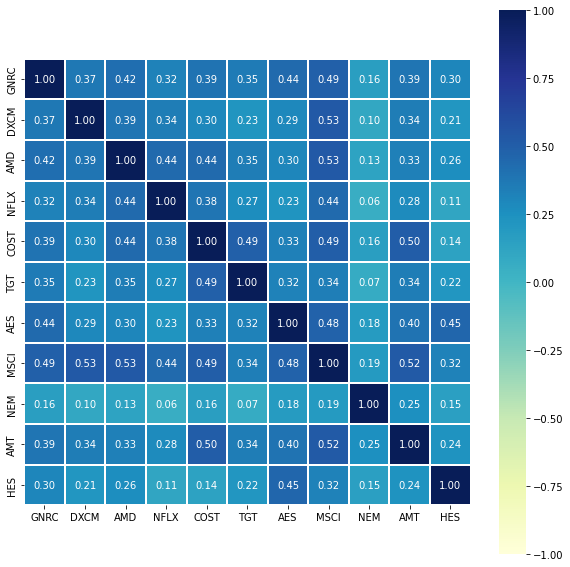

In [20]:
# corr = df.corr() -- Pearson Correlation

fig, ax = plt.subplots(figsize = (10, 10))
# Heatmap
sns.heatmap(returns.corr(), cmap = "YlGnBu", annot = True, fmt = ".2f", annot_kws = {"fontsize": 10},
            vmin = -1, vmax = 1, square = True, linewidths = 0.01, linecolor = "white", cbar = True)

sns.despine(top = True, right = True, left = True, bottom = True)

**Generate Random Weights Equal to 1**

In [29]:
# Generate 11 random values that sum to 1, 11 is the number of stocks in the portfolio
weights = np.random.random(11)
weights /= np.sum(weights) # equal to 1
print('Weights : ', weights)
print('Total Weights : ', np.sum(weights))

Weights :  [0.10778568 0.07257914 0.04542929 0.0188772  0.11439915 0.14953815
 0.14282819 0.04199325 0.11354644 0.03641521 0.15660832]
Total Weights :  0.9999999999999998


**Calculating Return of Portfolio**

In [22]:
# Provide return of portfolio using random weights over the whole dataset
np.sum(weights * returns.mean())*252

0.3271786254976162

**Calculating Volatility**

In [23]:
np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252, weights)))

0.24483043162787468

**Analyzing Returns & Risks of 10000 Combinations**

In [26]:
p_ret = [] # Returns list
p_vol = [] # Volatility list
p_SR = [] # Sharpe Ratio list
p_wt = [] # Stock weights list

for x in range (10000):
    # Generate random weights
    p_weights = np.random.random(11)
    p_weights /= np.sum(p_weights)
    
    # Add return using those weights to list
    ret_1 = np.sum(p_weights * returns.mean()) *252
    p_ret.append(ret_1)
    
    # Add volatility or standard deviation to list
    vol_1 = np.sqrt(np.dot(p_weights.T, np.dot(retu
    vol_1 = np.sqrt(np.dot(p_weights.T, np.dot(returns.cov()*252, p_weights)))
    p_vol.append(vol_1)
    
    # Get Sharpe ratio
    SR_1 = (ret_1 - risk_free_rate) / vol_1
    p_SR.append(SR_1)
    
    # Store the weights for each portfolio
    p_wt.append(p_weights)

# Convert to Numpy arrays
p_ret = np.array(p_ret)
p_vol = np.array(p_vol)
p_SR = np.array(p_SR)
p_wt = np.array(p_wt)

p_ret, p_vol, p_SR, p_wt
    

(array([0.3499158 , 0.370515  , 0.33862233, ..., 0.34748439, 0.35707245,
        0.37456711]),
 array([0.25676199, 0.24038371, 0.24063612, ..., 0.25189584, 0.24225474,
        0.2573782 ]),
 array([1.31411896, 1.48934798, 1.35525095, ..., 1.32985281, 1.42235587,
        1.40675125]),
 array([[0.12558334, 0.01133455, 0.1432954 , ..., 0.03323839, 0.15384797,
         0.11996897],
        [0.07596796, 0.13156102, 0.08720307, ..., 0.10448807, 0.03944344,
         0.06562409],
        [0.07216194, 0.09586476, 0.02095012, ..., 0.07348142, 0.13368755,
         0.16500787],
        ...,
        [0.08718789, 0.12352289, 0.10850942, ..., 0.05459062, 0.0967422 ,
         0.11748651],
        [0.14529709, 0.12756374, 0.02765784, ..., 0.09073684, 0.05807475,
         0.03213163],
        [0.13068177, 0.02348768, 0.16122223, ..., 0.15779603, 0.0231821 ,
         0.06730808]]))

**Plotting the Efficient Frontier**

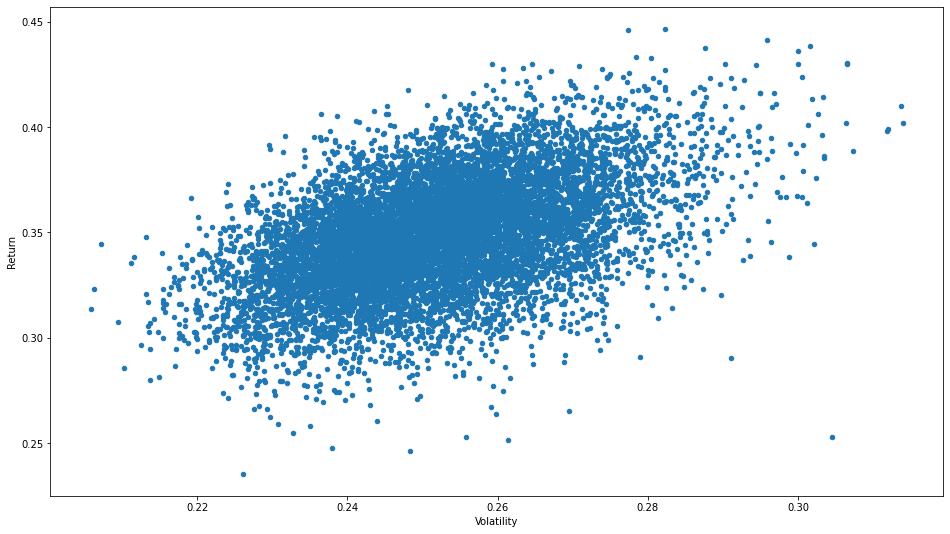

In [28]:
# Create a dataframe with returns and volatility

ports = pd.DataFrame({'Return' : p_ret, 'Volatility': p_vol})
ports.plot(x = 'Volatility', y = 'Return', kind ='scatter', figsize = (16,9));

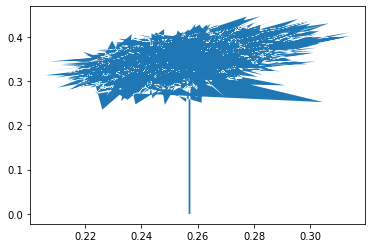

In [37]:

# Create Area Chart
x='Volatility'
y='Return'

# Area plot
plt.fill_between(x = 'Volatility', y1 = 'Return', data = ports)

**Sharpe Ratio**

People want to maximize returns while avoiding as much risk as possible. William Sharpe created the Sharpe Ratio to find the portfolio that provides the best return for the lowest amount of risk.

Sharpe Ratio = 
 

 rf = Risk Free Rate

 ri = Rate of Return of the stock

 stdi = Standard Deviation of the Stock

As return increases so does the Sharpe Ratio, but as Standard Deviation increase the Sharpe Ration decreases.

In [30]:
# Return the index of the largest Sharpe Ratio
SR_idx = np.argmax(p_SR)

# Find the ideal portfolio weighting at that index
i = 0
while i < 11:
    print("Stock : %s : %2.2f" % (port_list[i], (p_wt[4296][i] * 100)))
    i += 1
    
# Find volatility of that portfolio
print("\nVolatility :", p_vol[4296])
      
# Find return of that portfolio
print("Return :", p_ret[4296])

Stock : GNRC : 8.51
Stock : DXCM : 8.13
Stock : AMD : 5.39
Stock : NFLX : 6.24
Stock : COST : 12.53
Stock : TGT : 18.18
Stock : AES : 5.39
Stock : MSCI : 8.98
Stock : NEM : 1.47
Stock : AMT : 15.40
Stock : HES : 9.76

Volatility : 0.24000130312744913
Return : 0.3441852928337013
